### Overview
---
<img src="images/galaxy.png" width="1200" height="600">

To develop a robust model capable of accurately predicting **galaxy mass** based on observable properties such as brightness captured from different bands and redshift. The project aims to enhance model performance by effectively identifying and handling outliers in the dataset.

### Understanding the Statistical Concepts for Outlier detection
---

Features in predicting the target variable contains outliers which might overfit the trained model. In order to detect outliers, we'll understand the concept of *Probability distribution Function* which is a mathematical function which describes the likelihood of different outcomes in a random experiment. It consists of two types:

**PROBABILITY MASS FUNCTION (PMF)** : Probability function which assigns probabilities to discrete random variables. It forms a distribution of prb. of each discrete random variable.

**PROBABILITY DENSITY FUNCTION (PDF)** : Probability function represents probability density at a given point and it is used for continuous random variables. Here the prb. of a given point remains zero.

<img src="images/pdf_pmf.png" width="1000" height="400">

**CUMULATIVE DISTRIBUTION FUNCTION (CDF)** : Function which represents the prb. of a random variable less than or equal to a specific value. A 50% prb. in terms of CDF indicates that we've `accumulated` half of the probability density distribution. 

- The Inverse of CDF is known as `Percent Point Function` (PPF).


##### Relation b/w Prb. Density Function (PDF) & Cumulative Distribution Function (CDF)
<img src="images/pdf_cdf.png" width="750" height="850">

- The derivative of CDF gives us the value of PDF respectively. Similarly, a specific interval in Prb. density distribution on integration tells us the CDF value.

Here is the relationship between the Prb. Distribution Functions:

<img src="images/relation.png" width="900" height="400">

##### Some Basic Terminlogies of Normalization and Standardization

**NORMAL DISTRIBUTION** : Probability distribution with a bell curve.

**STANDARD NORMAL DISTRIBUTION** : Normal distribution with mean 0 and std.dev. 1.

**Z-SCORE** : A `standard` measure which tell how many std.dev. a data point is away from the mean(0).


In [1]:
from scipy import stats

# for a standard normal distribution:

# the cdf till mean is 
cdf_val = stats.norm.cdf(0)
print(f"{cdf_val=}") # we've accumulated 50% prb.

# we'll use ppf to find where the 70% prb. we accumulate:
ppf_val = stats.norm.ppf(0.5).round()
print(f"{ppf_val=}")

cdf_val=0.5
ppf_val=0.0


### About the Galaxy Mass Prediction Dataset
---
You can refer the dataset from kaggle website: [Galaxy Mass Prediction Dataset](https://www.kaggle.com/datasets/mexwell/galaxy-mass-prediction?select=Buzzard_DC1.csv)

In [2]:
# importing dataset
import pandas as pd
buzzard_df = pd.read_csv("D:\Pragyan\Tutorials\sources\\buzzard_DC1.csv")
buzzard_df.drop_duplicates(inplace=True)
buzzard_df.head()

,u,g,r,i,z,y,u.err,g.err,r.err,i.err,z.err,y.err,log.mass,redshift
0,17.8313,16.9077,16.4431,16.2099,16.0613,15.8732,0.0050,0.0050,0.005,0.0050,0.0050,0.0050,9.430220,0.038356
1,19.0731,17.7448,16.9789,16.5288,16.2551,15.9531,0.0051,0.0050,0.005,0.0050,0.0050,0.0050,10.119041,0.058309
2,21.6380,21.0106,20.8286,20.6283,20.6552,20.5280,0.0068,0.0051,0.005,0.0051,0.0052,0.0064,7.684077,0.063701
3,20.5474,19.5542,19.2387,19.0568,19.0887,18.9865,0.0055,0.0050,0.005,0.0050,0.0050,0.0051,8.426640,0.059006
4,21.2378,20.6876,20.5661,20.4371,20.4799,20.4503,0.0061,0.0051,0.005,0.0051,0.0052,0.0063,7.683522,0.063202


In [3]:
# shape
buzzard_df.shape

(111171, 14)

Correlation Matrix

In [4]:
buzzard_df.corr().round(decimals=2)

,u,g,r,i,z,y,u.err,g.err,r.err,i.err,z.err,y.err,log.mass,redshift
u,1.00,0.17,0.27,0.25,0.19,0.07,0.41,0.38,0.34,0.27,0.22,0.19,-0.01,0.08
g,0.17,1.00,0.36,0.34,0.26,0.09,0.42,0.45,0.40,0.32,0.26,0.23,-0.03,0.14
r,0.27,0.36,1.00,0.91,0.73,0.25,0.67,0.69,0.76,0.75,0.69,0.66,-0.29,0.36
i,0.25,0.34,0.91,1.00,0.82,0.29,0.59,0.61,0.72,0.80,0.77,0.76,-0.46,0.31
z,0.19,0.26,0.73,0.82,1.00,0.26,0.45,0.47,0.59,0.70,0.71,0.70,-0.49,0.17
y,0.07,0.09,0.25,0.29,0.26,1.00,0.16,0.18,0.25,0.32,0.35,0.36,-0.24,0.01
u.err,0.41,0.42,0.67,0.59,0.45,0.16,1.00,0.95,0.82,0.63,0.51,0.44,0.00,0.20
g.err,0.38,0.45,0.69,0.61,0.47,0.18,0.95,1.00,0.91,0.72,0.58,0.51,-0.03,0.23
r.err,0.34,0.40,0.76,0.72,0.59,0.25,0.82,0.91,1.00,0.89,0.78,0.69,-0.15,0.33
i.err,0.27,0.32,0.75,0.80,0.70,0.32,0.63,0.72,0.89,1.00,0.96,0.90,-0.39,0.25


### Identifying and Addressing Outliers
---

In [5]:
buzzard_df.describe()

,u,g,r,i,z,y,u.err,g.err,r.err,i.err,z.err,y.err,log.mass,redshift
count,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000,111171.000000
mean,33.030413,26.954737,25.876585,25.270737,24.976205,25.661707,0.727887,0.184556,0.083560,0.091286,0.133839,0.293970,8.738432,0.823070
std,19.751463,4.837493,1.669400,1.531607,1.922922,8.495484,0.602208,0.179245,0.073913,0.074179,0.113057,0.245775,1.125847,0.417609
min,17.831300,16.907700,16.443100,16.085800,15.836200,15.647800,0.005000,0.005000,0.005000,0.005000,0.005000,0.005000,5.768189,0.016282
25%,26.333550,25.849650,25.095250,24.524600,24.145450,23.835850,0.256700,0.052300,0.023500,0.026200,0.036900,0.082900,7.866537,0.495801
50%,27.350400,26.916500,26.239900,25.701400,25.330800,25.029400,0.576900,0.133800,0.064500,0.074400,0.106300,0.235900,8.605066,0.738636
75%,28.463800,27.705300,26.981350,26.443300,26.102500,25.860750,1.051000,0.260700,0.124100,0.143300,0.207400,0.455950,9.488014,1.079995
max,99.000000,99.000000,99.000000,27.000000,99.000000,99.000000,6.166700,2.757700,0.870900,0.658500,0.824900,1.599700,12.178689,1.999860


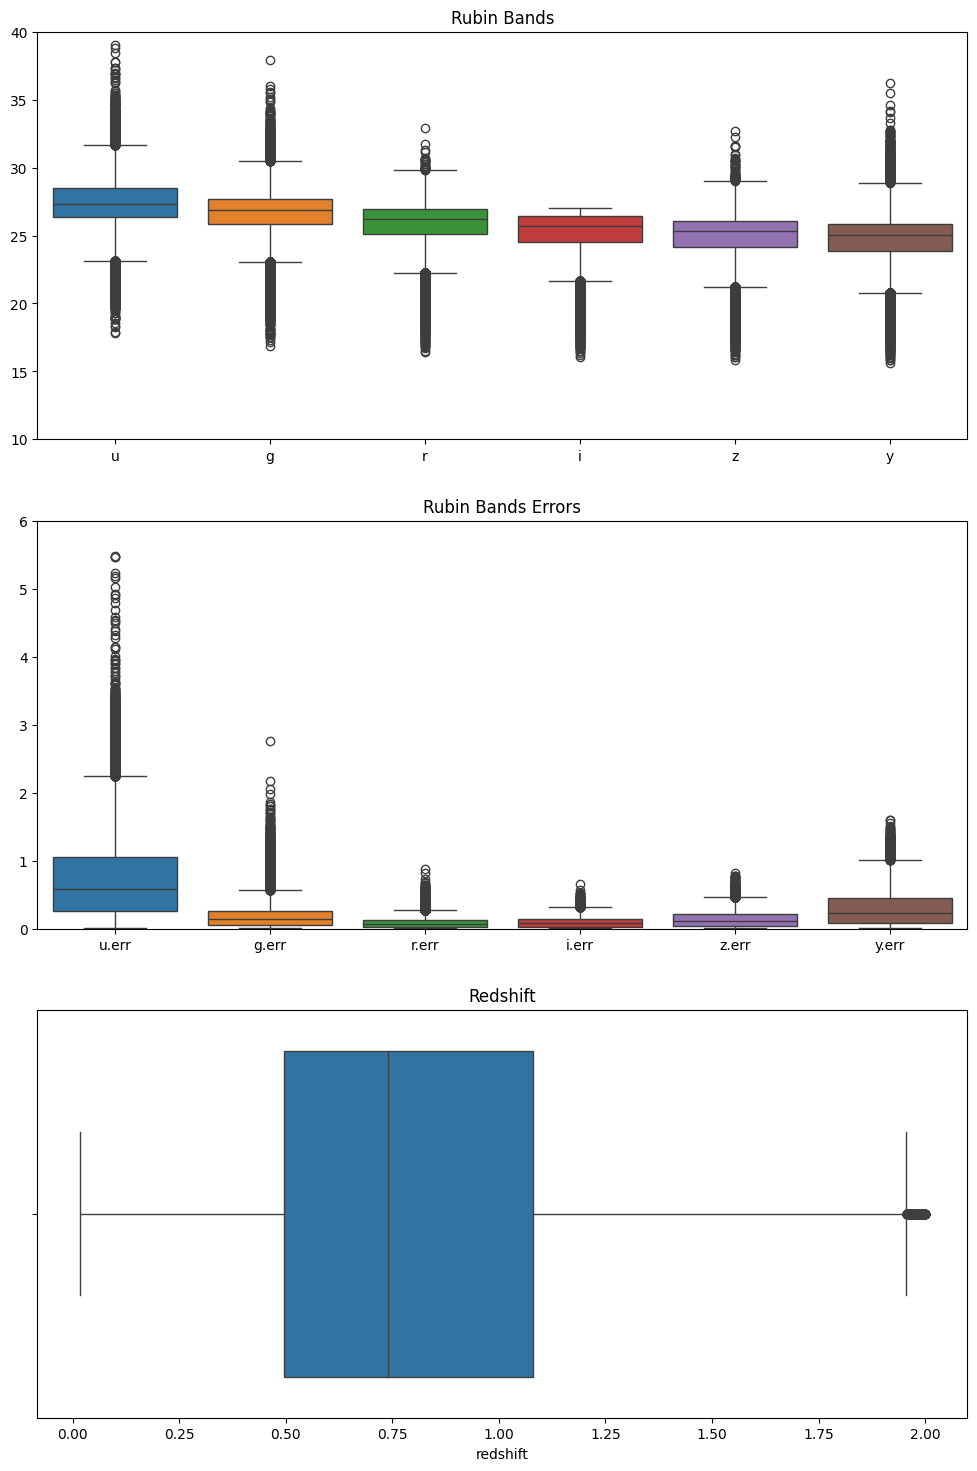

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

bands = buzzard_df.columns[:6]
errors = buzzard_df.columns[6:12]
redshift = buzzard_df.columns[-1]

plt.figure(figsize=(12,18))


plt.subplot(3,1,1)
sns.boxplot(buzzard_df[bands])
plt.title("Rubin Bands")
plt.ylim(10,40)


plt.subplot(3,1,2)
sns.boxplot(buzzard_df[errors])
plt.title("Rubin Bands Errors")
plt.ylim(0,6)


plt.subplot(3,1,3)
sns.boxplot(buzzard_df[redshift],orient='h')
plt.title("Redshift")


plt.show()

> Given the significant variability in the features, outliers might be influential. Let's identify the number of outliers in each column.

In [7]:
# defining a func to find outlier counts for each feature
def get_outlier_counts(df,threshold):

    # calculating zscore for threshold
    threshold_zscore = stats.norm.ppf(threshold)

    # calculating zscore for df
    dataframe_zscore = abs(stats.zscore(df))
    
    # outlier condition
    outliers = (dataframe_zscore > threshold_zscore).sum(axis=0)
    return outliers

# get outlier counts for threshold 0.95
features = buzzard_df.drop('log.mass',axis=1)
get_outlier_counts(features,0.95) # can experiment for different threshold values

u           9091
g            505
r           7615
i           8645
z           6012
y           1414
u.err       8502
g.err       7538
r.err       7780
i.err       7939
z.err       8330
y.err       8562
redshift    9767
dtype: int64

In [8]:
# defining a func to remove outliers from data during preprocessing

def remove_outliers(threshold,dataframe):
    df = dataframe.copy()

    # obtaining threshold values
    threshold_zscore = stats.norm.ppf(threshold)
    dataframe_zscore = abs(stats.zscore(df.select_dtypes(include="float64")))

    # getting outlier indices
    outliers =  dataframe_zscore[dataframe_zscore > threshold_zscore]

    remove_outliers_condition = outliers.sum(axis=1) > 4
    outliers_indices = outliers[remove_outliers_condition].index

    # dropping outliers
    df.drop(index=outliers_indices,inplace=True)
    
    return df

We'll be using this function during pre-processing to address the outliers for each threshold value and subsequently find the optimal threshold value for model performance.

### Building a Pre-processing Pipeline

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def preprocessing_pipeline(dataframe,threshold=0.95,keep_outliers=True):

    # whether to keep outliers or not
    if not keep_outliers:
        dataframe = remove_outliers(threshold,dataframe)

    # defining x and y
    features = dataframe.drop('log.mass',axis=1)
    target = dataframe['log.mass']


    # train-test split
    x_Train,x_Test,y_Train,y_Test = train_test_split(features,target,test_size=0.3,random_state=1)

    # standardizing training dataset
    scaler = StandardScaler()
    scaler.fit(x_Train)

    # transforming features
    x_Train = scaler.transform(x_Train)
    x_Test = scaler.transform(x_Test)

    return x_Train,x_Test,y_Train,y_Test

### Model Training & Evaluation

In [10]:
import numpy as np
from sklearn.metrics import r2_score

def get_model_score(model,keep_outliers,threshold=0.95) -> float:
    x_Train,x_Test,y_Train,y_Test = preprocessing_pipeline(buzzard_df,
                                    keep_outliers=keep_outliers,threshold=threshold)
    linear_model = model.fit(x_Train,y_Train)
    y_pred = linear_model.predict(x_Test)
    return r2_score(y_Test,y_pred) * 100


# defining threshold array to experiment with different threshold vals with different models
threshold_arr = np.arange(start=0.89,stop=1,step=0.001)
threshold_arr

array([0.89 , 0.891, 0.892, 0.893, 0.894, 0.895, 0.896, 0.897, 0.898,
       0.899, 0.9  , 0.901, 0.902, 0.903, 0.904, 0.905, 0.906, 0.907,
       0.908, 0.909, 0.91 , 0.911, 0.912, 0.913, 0.914, 0.915, 0.916,
       0.917, 0.918, 0.919, 0.92 , 0.921, 0.922, 0.923, 0.924, 0.925,
       0.926, 0.927, 0.928, 0.929, 0.93 , 0.931, 0.932, 0.933, 0.934,
       0.935, 0.936, 0.937, 0.938, 0.939, 0.94 , 0.941, 0.942, 0.943,
       0.944, 0.945, 0.946, 0.947, 0.948, 0.949, 0.95 , 0.951, 0.952,
       0.953, 0.954, 0.955, 0.956, 0.957, 0.958, 0.959, 0.96 , 0.961,
       0.962, 0.963, 0.964, 0.965, 0.966, 0.967, 0.968, 0.969, 0.97 ,
       0.971, 0.972, 0.973, 0.974, 0.975, 0.976, 0.977, 0.978, 0.979,
       0.98 , 0.981, 0.982, 0.983, 0.984, 0.985, 0.986, 0.987, 0.988,
       0.989, 0.99 , 0.991, 0.992, 0.993, 0.994, 0.995, 0.996, 0.997,
       0.998, 0.999])

#### Linear Regression

In [11]:
from sklearn.linear_model import LinearRegression
MODEL = LinearRegression()

with outliers

In [12]:
score = get_model_score(model=MODEL,keep_outliers=True)
print(f"{MODEL=} : {score}")

MODEL=LinearRegression() : 91.64824254656561


without outliers

In [13]:

linear_regression_res = []
for ci in threshold_arr:
    model_score = get_model_score(MODEL,threshold=ci,keep_outliers=False)
    print(ci, "\t", model_score)
    linear_regression_res.append(model_score)

0.89 	 95.44939153716659
0.891 	 95.38670717309044
0.892 	 95.351070466753
0.893 	 95.24259576480044
0.894 	 95.459926247812
0.895 	 95.35064402120716
0.896 	 95.400859310378
0.897 	 95.31773224110397
0.898 	 95.3027741324852
0.899 	 95.41206599915735
0.9 	 95.37129992209664
0.901 	 95.35901654749644
0.902 	 95.48701588636791
0.903 	 95.51674107098921
0.904 	 95.3389567885975
0.905 	 95.35557918440534
0.906 	 95.29810709139936
0.907 	 95.4425372517702
0.908 	 95.3091150520868
0.909 	 95.42389474314629
0.91 	 95.37193567574909
0.911 	 95.36268250633016
0.912 	 95.34975493379466
0.913 	 95.29495419029308
0.914 	 95.36414236744424
0.915 	 95.24389911643306
0.916 	 95.44532209677278
0.917 	 95.34995928119253
0.918 	 95.50990625553145
0.919 	 95.40743215464589
0.92 	 95.31548492187541
0.921 	 95.35468054066871
0.922 	 95.36113685901259
0.923 	 95.30972687663797
0.924 	 95.32271708291641
0.925 	 95.35274819875796
0.926 	 95.3334109435136
0.927 	 95.34321522782778
0.928 	 95.25950425635722
0.

In [14]:
score = max(linear_regression_res)
print(f"{MODEL=} : {score}")

MODEL=LinearRegression() : 95.5259558187525


[]

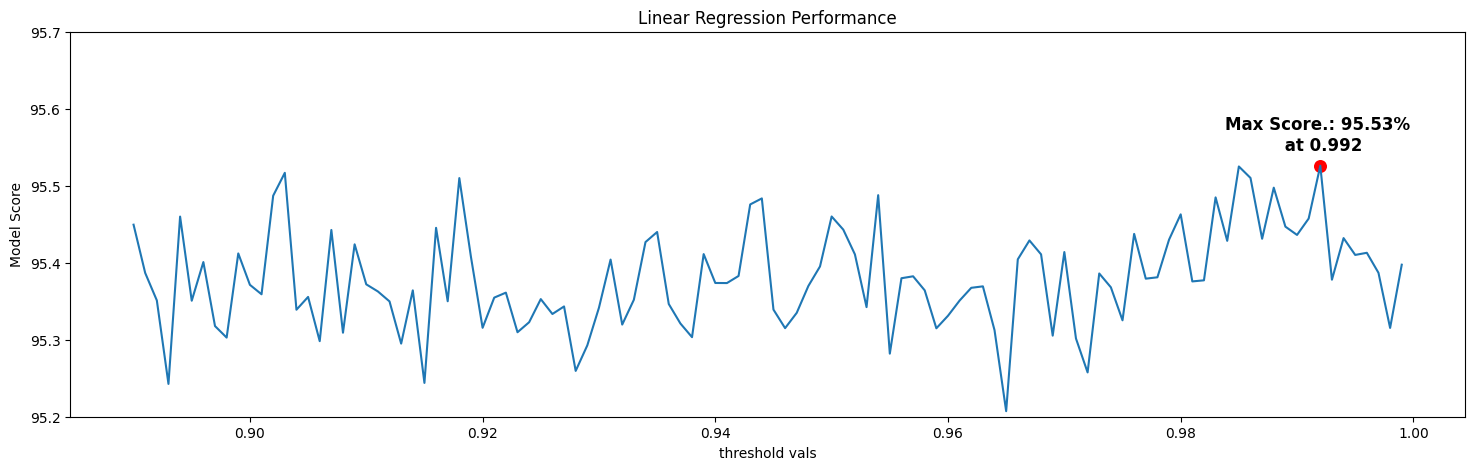

In [15]:
plt.figure(figsize=(18,5))

# plotting the results for each threshold
sns.lineplot(x=threshold_arr,y=linear_regression_res)

# finding the peak val
optimal_threshold_index = linear_regression_res.index(score)
peak_x = threshold_arr[optimal_threshold_index]
peak_y = score
sns.scatterplot(x=[peak_x],y=[peak_y],
                marker=".",color='r',s=500)
plt.text(peak_x, peak_y+0.02, f'Max Score.: {round(peak_y,2)}% \n at {round(peak_x,3)}', 
         ha='center', fontsize=12, fontweight='bold')


plt.title("Linear Regression Performance")
plt.xlabel("threshold vals")
plt.ylabel("Model Score")
plt.ylim(95.2,95.7)
plt.plot()

In [16]:
# finding the no. of outliers in each feature for threshold=0.992

get_outlier_counts(buzzard_df,threshold=peak_x)

u           9091
g            446
r           2732
i           3595
z           1589
y           1414
u.err       3348
g.err       3611
r.err       2921
i.err       1827
z.err       2269
y.err       2103
log.mass     676
redshift    2164
dtype: int64

### Conclusion

The model achieved an accuracy of approximately 91% when including outliers. By removing 0.8% of outliers, we significantly improved performance to 95.5%. This clearly demonstrates the substantial impact of outliers on the model.

To further enhance accuracy, we can explore alternative regression models such as Decision Trees and Support Vector Regression.